In [21]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
xl = 2
rhol = 4
umax = 1.0
rhomax = 10
sigma = 1
nt = 30
nx =81
L = 4
dx = L/(nx - 1)
dt = sigma * dx / umax

In [22]:
x = np.linspace(0, L, num = nx)
rho0 = np.zeros(nx)
mask = np.where(np.logical_and(x >= 0, x < 2))
rho0[mask] = x[mask] * rhol /xl
print(rho0)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


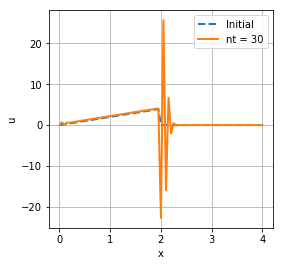

In [23]:
def FTBS(rho0, nt, dt, dx, umax, rhomax):
    rhohis = [rho0.copy()]
    rho = rho0.copy()
    for i in range(1, nt):
        rho[1:] = rho[1:] - dt/dx *(umax*(1 - rho[1:]/rhomax) - umax*(1 - rho[:-1]/rhomax))
        rhohis.append(rho.copy())
    return rhohis
rhohist = FTBS(rho0, nt, dt, dx, umax, rhomax)
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, rho0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, rhohist[20], label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
pyplot.legend()
#pyplot.xlim(0.0, L)
# pyplot.ylim(-5, 30)

In [4]:
import ipywidgets
def plot(n, rhohist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x, rhohist[0], label = 'initial')
    pyplot.plot(x, rhohist[n], label = 'Current')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()
def interactive_plot(x, rhohis):
    nt = len(rhohis) -1
    nt_slider = ipywidgets.IntSlider(value = 0, min = 0, max = nt, step = 1,
                                   description = 'Time step')
    w = ipywidgets.interactive(plot, n = nt_slider, x = ipywidgets.fixed(x), rhohis = ipywidgets.fixed(rhohis))
    return w

In [5]:
interactive_plot(x, rhohis)
# print(ipywidgets.fixed(rhohis))

ValueError: cannot find widget or abbreviation for argument: 'rhohist'